# Part 1 (and 2) - Fish tracking

I had a bit of a tip off that the naive approach to this question (appending fish ages to a list and incrementing) would choke on the number of iterations required for the second part, so I went straight to something that should be more memory efficient--tracking the number of fish at each generation. This requires a little bit of noodling, since the fish from the first generation have slightly different behaviour, but that can be tracked by entering them into the cue two days later than the fish that recycle from the bottom of the queue to the top.

The number of fish after 80 days is 182467

The number of fish after 256 days is 854747020919



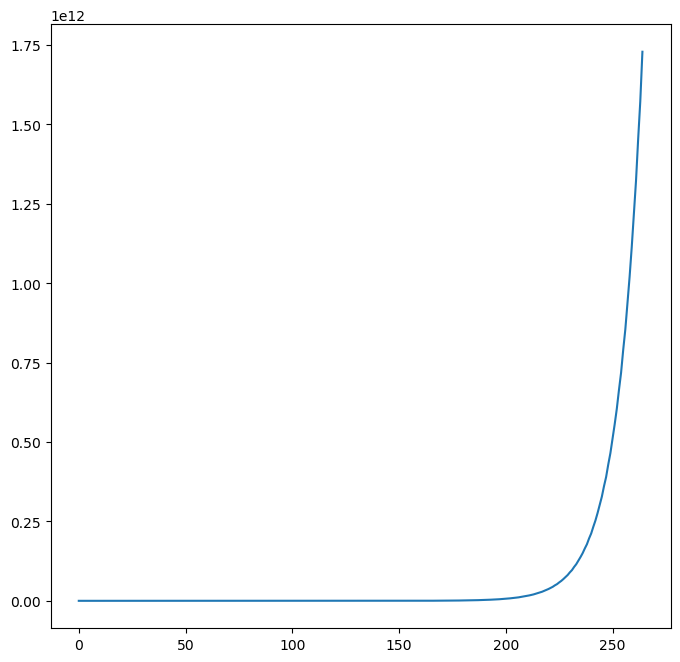

In [16]:
# The list of fish at each generation. I'll move the fish total from one spot to the next each day as required.
fish_tracker = [0,0,0,0,0,0,0,0,0]

# File is one line today, so parsing is pretty easy
with open('day6_input.txt') as file:
    line = file.readline()

fishies = [int(i) for i in line.strip().split(",")]

for fish in fishies:
    fish_tracker[fish] += 1
    
generations = fish_tracker

# With everything initialized, the fish are moved through their generational sequence as described in the question.
for cycle in range(256):
    fish_tracker = [fish_tracker[1],
                    fish_tracker[2],
                    fish_tracker[3],
                    fish_tracker[4],
                    fish_tracker[5],
                    fish_tracker[6],
                    fish_tracker[7] + fish_tracker[0],
                    fish_tracker[8],
                    fish_tracker[0]]
    generations.append(sum(fish_tracker))

# And the answers from both parts can be directly printed (and plotted)    
print(f"The number of fish after 80 days is {generations[80]}\n")
print(f"The number of fish after 256 days is {generations[256]}\n")

# Simple matplotlib plotting to show the exponential knee shape
import numpy as np 
import matplotlib.pyplot as plt

plt.clf()
plt.plot(generations)
plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams['figure.dpi'] = 100
plt.show()